In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df = pd.DataFrame(pd.read_csv("/content/diabetespred.csv"))
df.head() # showing the  Top 5 Records

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
0,Female,80.0,0,1,never,25.19,6.6,140,0
1,Female,54.0,0,0,No Info,27.32,6.6,80,0
2,Male,28.0,0,0,never,27.32,5.7,158,0
3,Female,36.0,0,0,current,23.45,5.0,155,0
4,Male,76.0,1,1,current,20.14,4.8,155,0


In [3]:
df.shape #the dataset consists of 100000 rows and 9 columns

(100000, 9)

In [4]:
df.isna().sum()

gender                 0
age                    0
hypertension           0
heart_disease          0
smoking_history        0
bmi                    0
HbA1c_level            0
blood_glucose_level    0
diabetes               0
dtype: int64

In [5]:
df.duplicated().sum()

3854

In [8]:
df.drop_duplicates()

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
0,Female,80.0,0,1,never,25.19,6.6,140,0
1,Female,54.0,0,0,No Info,27.32,6.6,80,0
2,Male,28.0,0,0,never,27.32,5.7,158,0
3,Female,36.0,0,0,current,23.45,5.0,155,0
4,Male,76.0,1,1,current,20.14,4.8,155,0
...,...,...,...,...,...,...,...,...,...
99994,Female,36.0,0,0,No Info,24.60,4.8,145,0
99996,Female,2.0,0,0,No Info,17.37,6.5,100,0
99997,Male,66.0,0,0,former,27.83,5.7,155,0
99998,Female,24.0,0,0,never,35.42,4.0,100,0


In [10]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 9 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   gender               100000 non-null  object 
 1   age                  100000 non-null  float64
 2   hypertension         100000 non-null  int64  
 3   heart_disease        100000 non-null  int64  
 4   smoking_history      100000 non-null  object 
 5   bmi                  100000 non-null  float64
 6   HbA1c_level          100000 non-null  float64
 7   blood_glucose_level  100000 non-null  int64  
 8   diabetes             100000 non-null  int64  
dtypes: float64(3), int64(4), object(2)
memory usage: 6.9+ MB


In [11]:
df.nunique()

gender                    3
age                     102
hypertension              2
heart_disease             2
smoking_history           6
bmi                    4247
HbA1c_level              18
blood_glucose_level      18
diabetes                  2
dtype: int64

In [12]:
df.describe()

,age,hypertension,heart_disease,bmi,HbA1c_level,blood_glucose_level,diabetes
count,100000.000000,100000.00000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000
mean,41.885856,0.07485,0.039420,27.320767,5.527507,138.058060,0.085000
std,22.516840,0.26315,0.194593,6.636783,1.070672,40.708136,0.278883
min,0.080000,0.00000,0.000000,10.010000,3.500000,80.000000,0.000000
25%,24.000000,0.00000,0.000000,23.630000,4.800000,100.000000,0.000000
50%,43.000000,0.00000,0.000000,27.320000,5.800000,140.000000,0.000000
75%,60.000000,0.00000,0.000000,29.580000,6.200000,159.000000,0.000000
max,80.000000,1.00000,1.000000,95.690000,9.000000,300.000000,1.000000


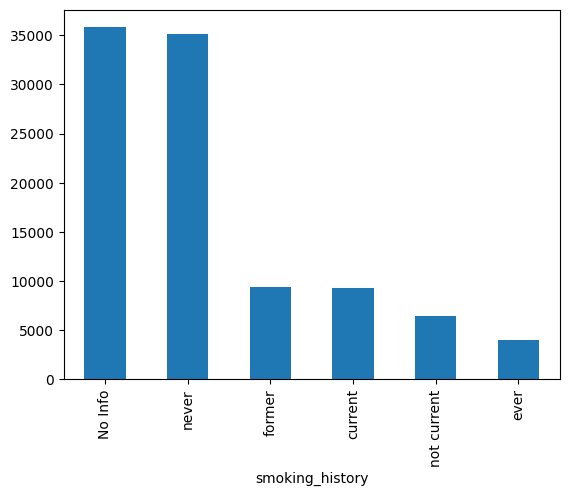

In [13]:
df.smoking_history.value_counts().plot(kind='bar')
plt.show()

**GENDER**

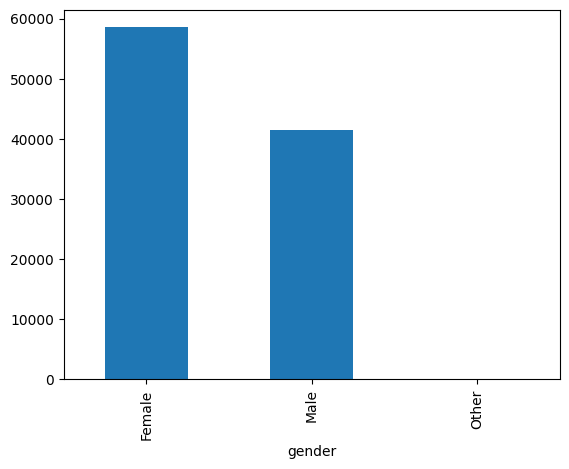

In [14]:
df.gender.value_counts().plot(kind='bar')
plt.show()

In [15]:
df.gender.value_counts()

gender
Female    58552
Male      41430
Other        18
Name: count, dtype: int64

In [16]:
df.groupby('gender').mean(numeric_only=True)

,age,hypertension,heart_disease,bmi,HbA1c_level,blood_glucose_level,diabetes
gender,,,,,,,
Female,42.463291,0.071680,0.026677,27.449287,5.509477,137.468951,0.076189
Male,41.075139,0.079363,0.057446,27.139108,5.553041,138.890031,0.097490
Other,29.555556,0.000000,0.000000,27.379444,5.405556,139.444444,0.000000


In [17]:
pd.crosstab(df.gender, df.smoking_history)

smoking_history,No Info,current,ever,former,never,not current
gender,,,,,,
Female,19700,5058,2238,4774,22869,3913
Male,16110,4228,1765,4578,12223,2526
Other,6,0,1,0,3,8


Because the lack of correlation between gender and other variables, we can not fix by this values by hand. Beacuse there is only 18 Other values, we will set them to most frequent cateogory, Female.

In [18]:
df.loc[df.gender=='Other', 'gender']='Female'

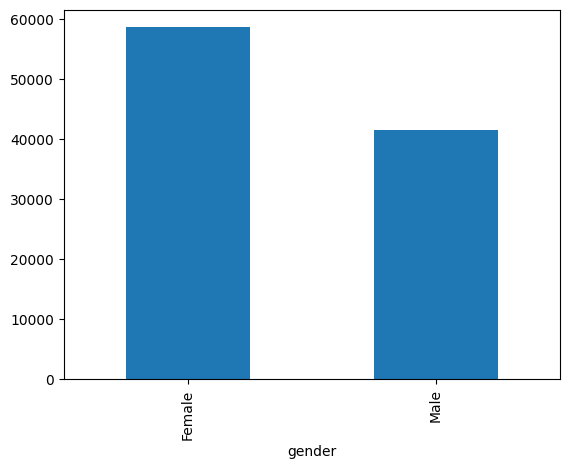

In [19]:
df.gender.value_counts().plot(kind='bar')
plt.show()

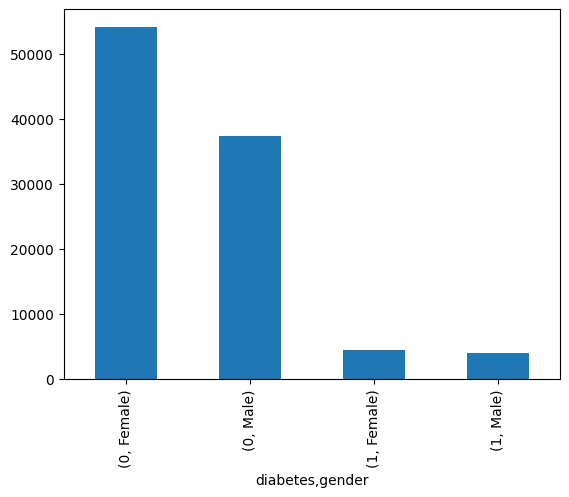

In [20]:
df.groupby('diabetes')['gender'].value_counts().plot(kind='bar')
plt.show()

In [21]:
df.head()

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
0,Female,80.0,0,1,never,25.19,6.6,140,0
1,Female,54.0,0,0,No Info,27.32,6.6,80,0
2,Male,28.0,0,0,never,27.32,5.7,158,0
3,Female,36.0,0,0,current,23.45,5.0,155,0
4,Male,76.0,1,1,current,20.14,4.8,155,0


In [22]:
df['gender'].unique()

array(['Female', 'Male'], dtype=object)

In [24]:
df['age'].unique()

array([80.  , 54.  , 28.  , 36.  , 76.  , 20.  , 44.  , 79.  , 42.  ,
       32.  , 53.  , 78.  , 67.  , 15.  , 37.  , 40.  ,  5.  , 69.  ,
       72.  ,  4.  , 30.  , 45.  , 43.  , 50.  , 41.  , 26.  , 34.  ,
       73.  , 77.  , 66.  , 29.  , 60.  , 38.  ,  3.  , 57.  , 74.  ,
       19.  , 46.  , 21.  , 59.  , 27.  , 13.  , 56.  ,  2.  ,  7.  ,
       11.  ,  6.  , 55.  ,  9.  , 62.  , 47.  , 12.  , 68.  , 75.  ,
       22.  , 58.  , 18.  , 24.  , 17.  , 25.  ,  0.08, 33.  , 16.  ,
       61.  , 31.  ,  8.  , 49.  , 39.  , 65.  , 14.  , 70.  ,  0.56,
       48.  , 51.  , 71.  ,  0.88, 64.  , 63.  , 52.  ,  0.16, 10.  ,
       35.  , 23.  ,  0.64,  1.16,  1.64,  0.72,  1.88,  1.32,  0.8 ,
        1.24,  1.  ,  1.8 ,  0.48,  1.56,  1.08,  0.24,  1.4 ,  0.4 ,
        0.32,  1.72,  1.48])

In [25]:
df['hypertension'].unique()

array([0, 1])

In [26]:
df['heart_disease'].unique()

array([1, 0])

In [27]:
df['smoking_history'].unique()

array(['never', 'No Info', 'current', 'former', 'ever', 'not current'],
      dtype=object)

In [28]:
df['bmi'].unique()

array([25.19, 27.32, 23.45, ..., 59.42, 44.39, 60.52])

In [29]:
df['HbA1c_level'].unique()

array([6.6, 5.7, 5. , 4.8, 6.5, 6.1, 6. , 5.8, 3.5, 6.2, 4. , 4.5, 9. ,
       7. , 8.8, 8.2, 7.5, 6.8])

In [30]:
df['blood_glucose_level'].unique()

array([140,  80, 158, 155,  85, 200, 145, 100, 130, 160, 126, 159,  90,
       260, 220, 300, 280, 240])

In [31]:
# define numerical & categorical columns
numeric_columns = [feature for feature in df.columns if df[feature].dtype != 'O'] # if data type of df[feature] is not equal to object then it basically becomes a numeric feature. [IF ITS AN FLOAT TYPE I.E, NOT AN OBJECT THEN IT'S NUMERIC IN NATURE]
categorical_columns = [feature for feature in df.columns if df[feature].dtype == 'O'] # if data type of df[feature] is  equal to object then it basically becomes a categorical feature. [ IT'S string IN NATURE I.E, IT CONTAINS AN OBJECT]

# print columns
print('We have {} numerical columns : {}'.format(len(numeric_columns), numeric_columns))
print('\nWe have {} categorical columns : {}'.format(len(categorical_columns), categorical_columns))

We have 7 numerical columns : ['age', 'hypertension', 'heart_disease', 'bmi', 'HbA1c_level', 'blood_glucose_level', 'diabetes']

We have 2 categorical columns : ['gender', 'smoking_history']


In [32]:
df.head(2)

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
0,Female,80.0,0,1,never,25.19,6.6,140,0
1,Female,54.0,0,0,No Info,27.32,6.6,80,0


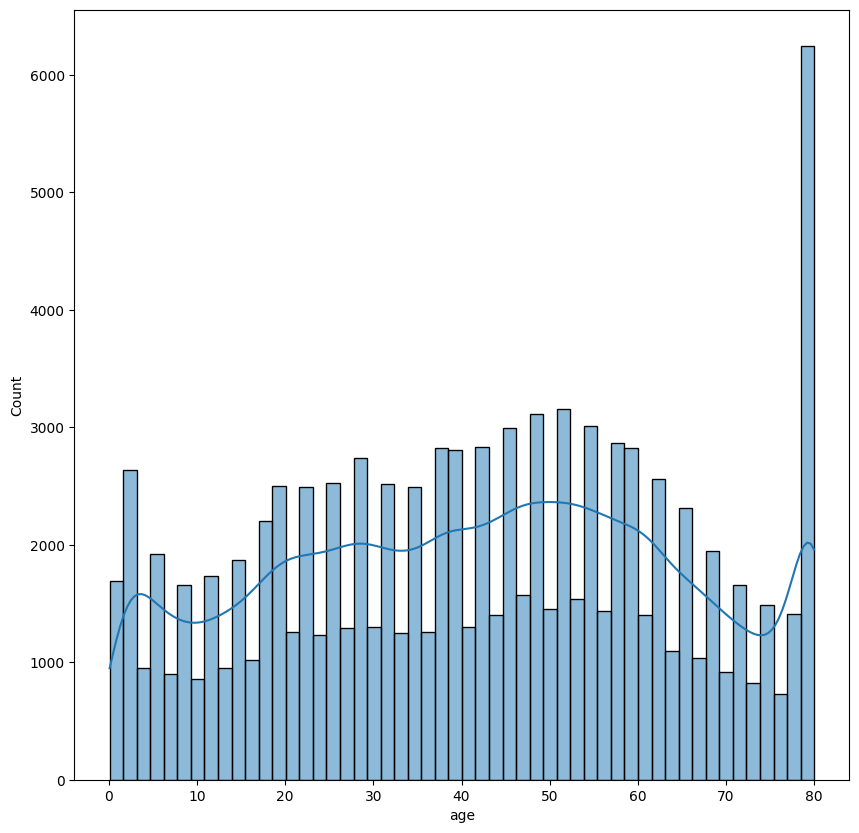

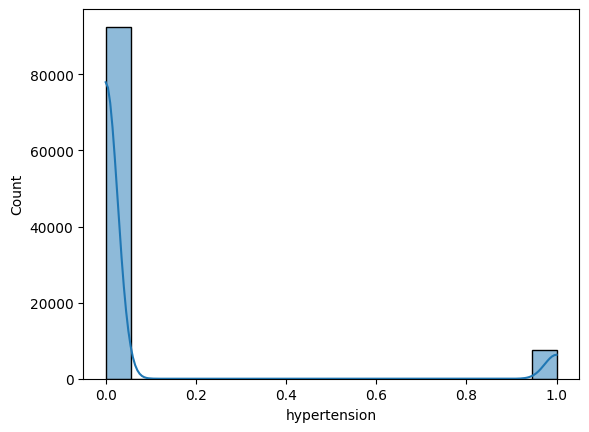

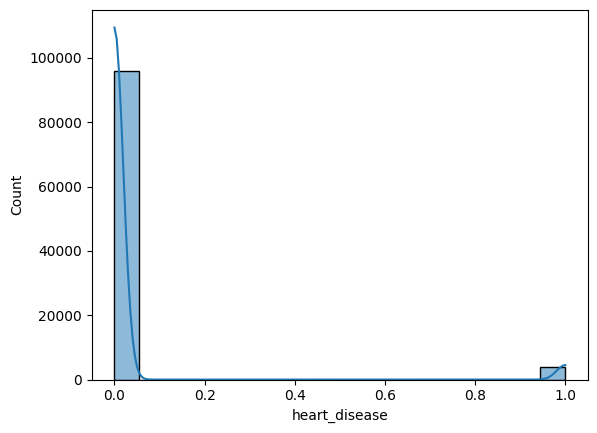

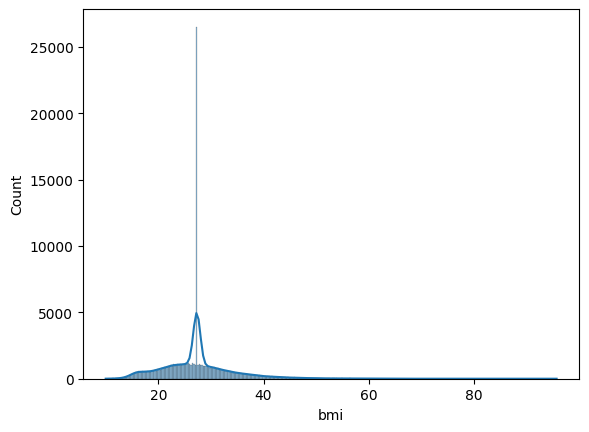

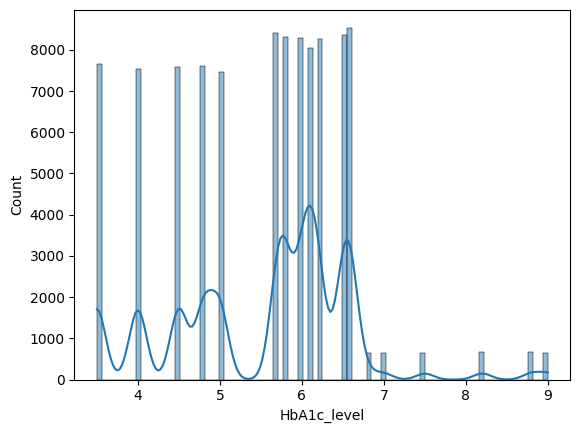

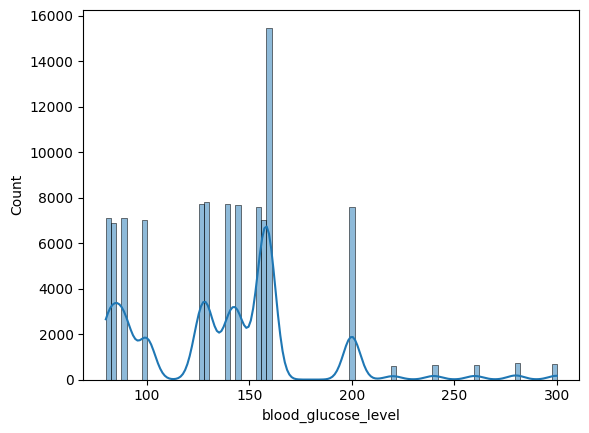

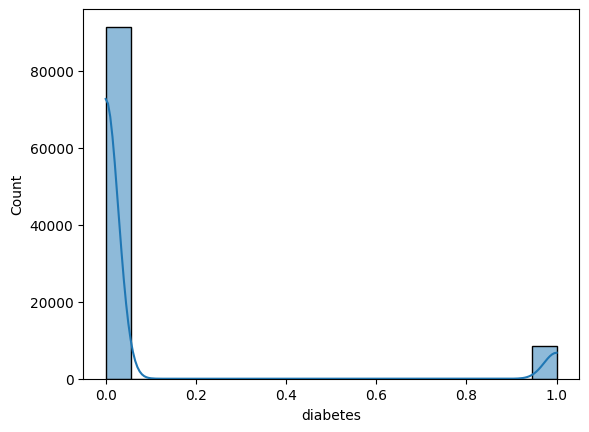

In [33]:
import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize=(10,10))
x = 1
for i in numeric_columns:
    sns.histplot(data = df, x = i, kde = True)
    print('\n')
    plt.show()

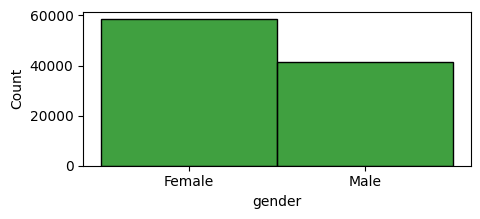

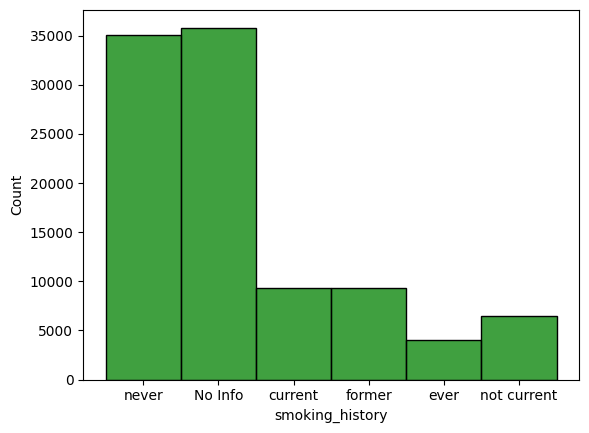

In [34]:
plt.figure(figsize=(5,2))
x = 1
for i in categorical_columns:
    sns.histplot(data = df, x = i, color = 'green')
    print('\n')
    plt.show()

<Axes: >

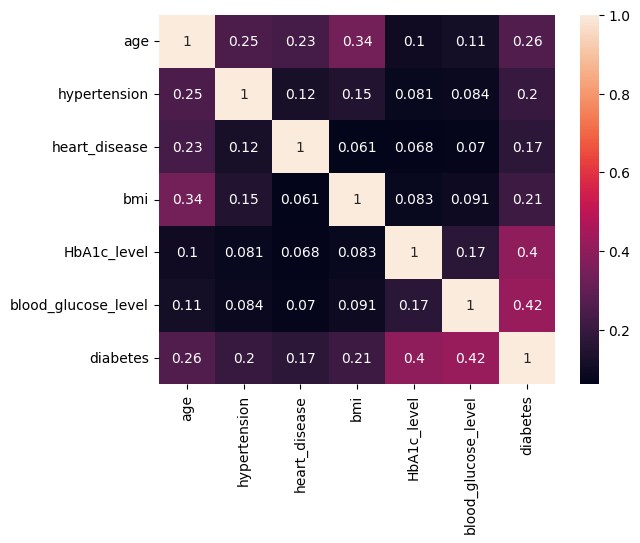

In [35]:
sns.heatmap(df[numeric_columns].corr(), annot = True)